In [1]:
%matplotlib inline
import pickle
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
with open('un_reshape2.pkl', 'r') as picklefile:
    undata = pickle.load(picklefile)

###Drop redundant seriesname column

In [3]:
undata = undata.drop(['seriesname'], axis = 1)

In [4]:
undata.shape

(5477, 90)

In [5]:
undata.describe()

,year,isdeveloped,isldc2014,islldc,ismdgcountry,gdppc2012,population2012,AIDS deaths,Net ODA to LDCs as percentage of OECD/DAC donors GNI,"ODA that is untied, million US$",...,"Tuberculosis incidence rate per year per 100,000 population (lower bound)","HIV incidence rate, 15-49 years old, percentage (lower bound)","ODA to basic social services, million US$","Developed country imports from the LDCs, admitted duty free, percentage","Antenatal care coverage, at least one visit, percentage","Population below national poverty line, urban, percentage","Adolescent birth rate, per 1,000 women","Children under 5 sleeping under insecticide-treated bed nets, percentage","Condom use at last high-risk sex, 15-24 years old, women, percentage","Children under 5 with fever being treated with anti-malarial drugs, percentage"
count,5477.000000,5422.000000,5477.000000,5477.000000,5477.000000,5124.000000,5.124000e+03,2808.000000,610.000000,464.000000,...,5002.000000,1980.000000,395.000000,9.310000e+02,698.000000,449.000000,2838.000000,181.000000,203.000000,201.000000
mean,2001.702209,0.236997,0.220559,0.009129,0.989958,15935.060031,3.374047e+07,12499.943302,0.119832,1993.156426,...,121.400020,0.342587,403.050405,-1.383553e+07,83.174255,26.187461,44.407125,25.323757,39.697488,29.350249
std,7.085661,0.425280,0.414661,0.095118,0.099714,23630.198589,1.308793e+08,36711.905058,0.105204,3384.985277,...,170.136404,0.755555,1086.411593,1.718807e+08,18.901341,15.662865,37.794784,21.333467,19.219187,21.390816
min,1984.000000,0.000000,0.000000,0.000000,0.000000,128.100000,5.046000e+03,0.000000,0.000035,0.000000,...,0.340000,0.000000,0.000000,-2.146826e+09,15.400000,0.600000,0.000000,0.000000,1.300000,0.000000
25%,1996.000000,0.000000,0.000000,0.000000,1.000000,1688.375000,1.114106e+06,122.750000,0.040000,220.757500,...,17.000000,0.010000,39.955000,9.199000e+01,76.550000,13.600000,15.800000,5.000000,25.200000,8.200000
50%,2002.000000,0.000000,0.000000,0.000000,1.000000,6300.800000,6.645827e+06,981.000000,0.090000,696.445000,...,57.000000,0.050000,105.060000,9.946000e+01,90.450000,24.800000,33.000000,22.000000,39.300000,28.300000
75%,2008.000000,0.000000,0.000000,0.000000,1.000000,20006.000000,2.229391e+07,5622.000000,0.167500,2017.922500,...,164.000000,0.260000,358.245000,9.998000e+01,97.100000,36.500000,62.675000,41.100000,54.550000,48.300000
max,2015.000000,1.000000,1.000000,1.000000,1.000000,158976.800000,1.377065e+09,407865.000000,0.520000,21520.220000,...,1507.000000,5.630000,8694.440000,1.000000e+02,100.000000,68.800000,229.000000,80.600000,82.000000,74.000000


###Transform column names for easier calling

In [6]:
for column in undata.columns:
    name_as_list = column.split()
    new_list = []
    for word in name_as_list:
        word = re.sub("[^a-z0-9]", "", word.lower())
        new_list.append(word)
    new_name = '_'.join(new_list)
    undata.rename(columns={column: new_name}, inplace=True)

In [7]:
for column in sorted(undata.columns):
    print column

adolescent_birth_rate_per_1000_women
agriculture_support_estimate_for_oecd_countries_as_percentage_of_their_gdp
agriculture_support_estimate_for_oecd_countries_million_us
aids_deaths
aids_deaths_lower_bound
aids_deaths_upper_bound
aids_orphans_one_or_both_parents
antenatal_care_coverage_at_least_four_visits_percentage
antenatal_care_coverage_at_least_one_visit_percentage
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage_lower_bound
antiretroviral_therapy_coverage_among_people_with_advanced_hiv_infection_percentage_upper_bound
children_under_5_sleeping_under_insecticidetreated_bed_nets_percentage
children_under_5_with_fever_being_treated_with_antimalarial_drugs_percentage
condom_use_at_last_highrisk_sex_1524_years_old_men_percentage
condom_use_at_last_highrisk_sex_1524_years_old_women_percentage
condom_use_to_overall_contraceptive_use_among_currently_married_women_1549_y

Limit data to years with values

In [8]:
unlimit = undata[undata['year'] >= 1990]
unlimit = unlimit[unlimit['year'] < 2014]

Save to file

In [9]:
with open('un_explore2.pkl', 'w') as picklefile:
    pickle.dump(unlimit, picklefile)

###Create reusable plotting functions

In [10]:
def plot_me_data(row, ylabel='percent'):
    yearly = undata.groupby(['year'])[row].mean()

    plt.figure(figsize = (12,5))
    yearly.plot(kind='bar', x='year', y=row)
    plt.title(row)
    plt.ylabel(ylabel)


In [11]:
def plot_me_data2(row, ylabel='percent'):
    yearly = unlimit.groupby(['year'])[row].mean()

    plt.figure(figsize = (12,5))
    yearly.plot(kind='bar', x='year', y=row)
    plt.title(row)
    plt.ylabel(ylabel)

In [12]:
def plot_by_country(col, ylabel='percent'):
    plt.figure(figsize=(12,5))
    for country in set(undata['countryname']):
        cp = undata[undata['countryname'] == country]
        cp = cp.sort(columns='year')
        plt.plot(cp['year'], cp[col], label=country)
        
    plt.title(col)
    plt.xlabel('year')
    plt.ylabel(ylabel)
    plt.show()

In [13]:
def plot_by_region(col, ylabel='percent'):
    plt.figure(figsize=(12,5))
    for region in set(unlimit['mdgregions']):
        cp = unlimit[unlimit['mdgregions'] == region]
        cp = pd.DataFrame(cp.groupby(['year'])[col].mean())
        cp = cp.sort()
        plt.plot(cp[col], label=region)
        
    plt.title(col)
    plt.xlabel('year')
    plt.ylabel(ylabel)
    plt.legend(prop={'size':8})
    plt.show()

###Investigate HIV/AIDS data

Look at sum of AIDS deaths vs. yearly mean

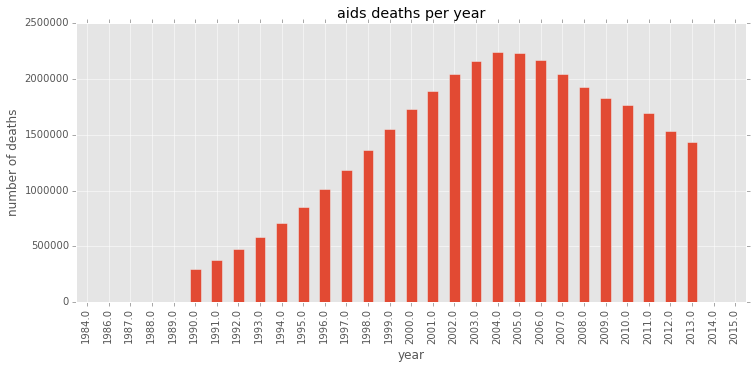

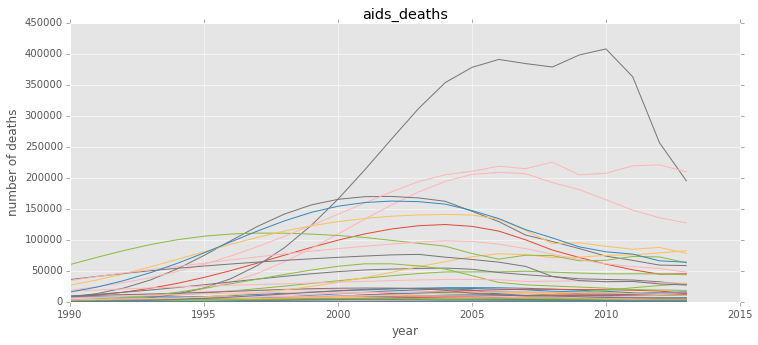

In [14]:
yearly = undata.groupby(['year'])['aids_deaths'].sum()

plt.figure(figsize = (12,5))
yearly.plot(kind='bar', x='year', y='aids_deaths')
plt.title('aids deaths per year')
plt.ylabel('number of deaths')

plot_by_country('aids_deaths', 'number of deaths')

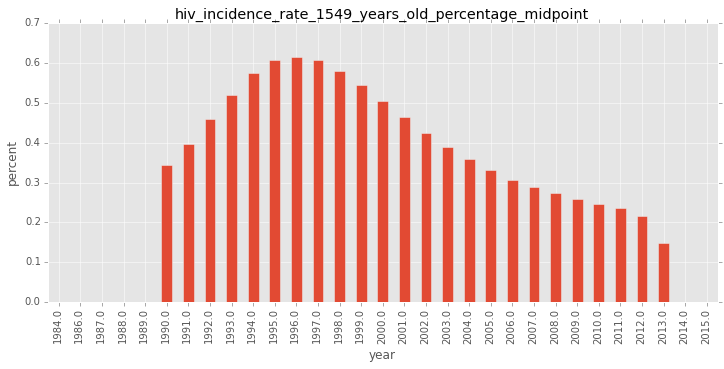

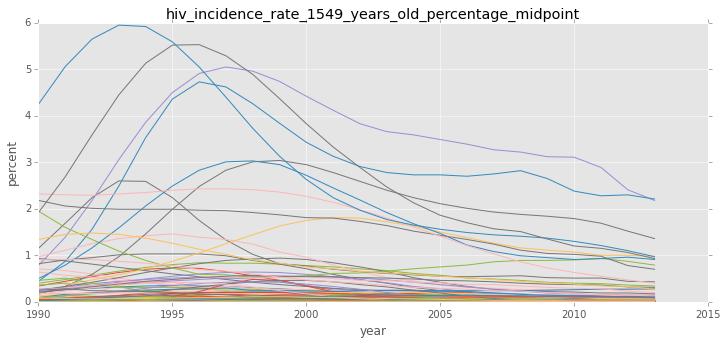

In [15]:
hiv = 'hiv_incidence_rate_1549_years_old_percentage_midpoint'
plot_me_data(hiv)
plot_by_country(hiv)

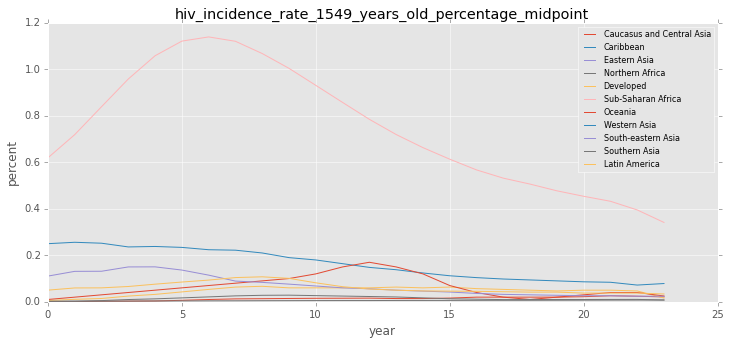

In [16]:
plot_by_region(hiv)

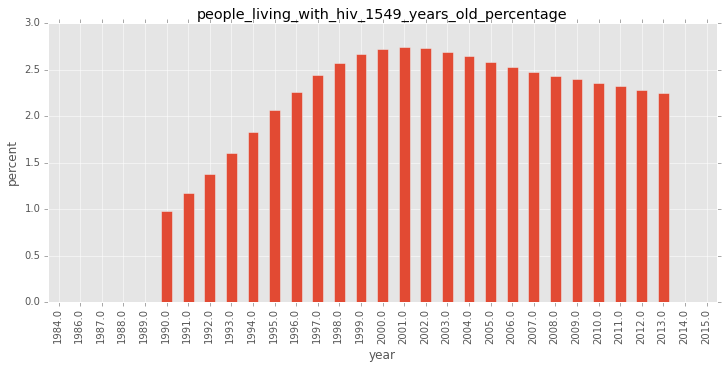

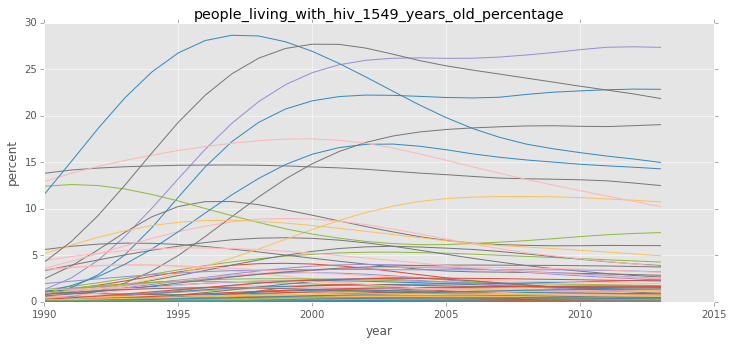

In [17]:
hiv_pct = 'people_living_with_hiv_1549_years_old_percentage'
plot_me_data(hiv_pct)
plot_by_country(hiv_pct)

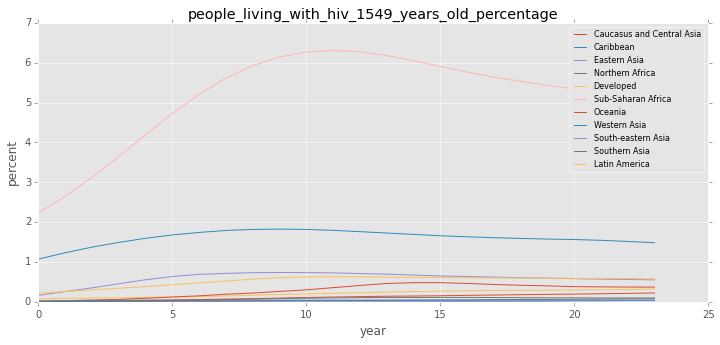

In [18]:
plot_by_region(hiv_pct)

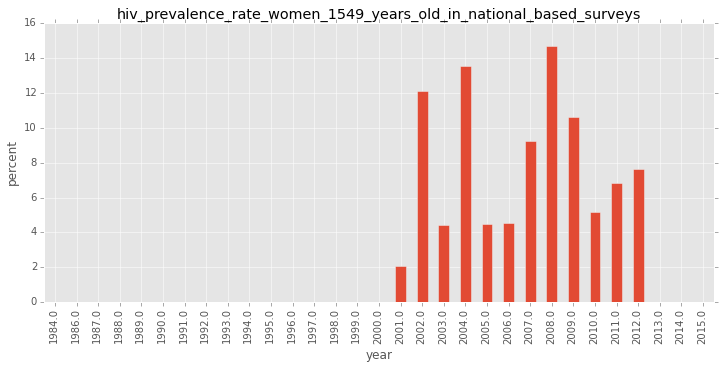

In [19]:
hiv_prev = 'hiv_prevalence_rate_women_1549_years_old_in_national_based_surveys'
plot_me_data(hiv_prev)

In [20]:
undata[['countryname', 'year', hiv]].sort(columns=hiv, ascending=False).head(15)

,countryname,year,hiv_incidence_rate_1549_years_old_percentage_midpoint
2237,Zimbabwe,1993,5.95
2238,Zimbabwe,1994,5.92
2236,Zimbabwe,1992,5.65
2239,Zimbabwe,1995,5.59
344,Botswana,1996,5.53
343,Botswana,1995,5.52
345,Botswana,1997,5.29
342,Botswana,1994,5.13
2235,Zimbabwe,1991,5.06
2240,Zimbabwe,1996,5.05


###Save out CSV for visualization

In [21]:
yearly = pd.DataFrame(unlimit.groupby(['countryname', 'iso3code', 'year'])[hiv].mean())
bycountry = yearly.unstack()
bycountry.to_csv('hiv_incidence.csv', encoding='utf-8')

###Investigate other reproductive health variables

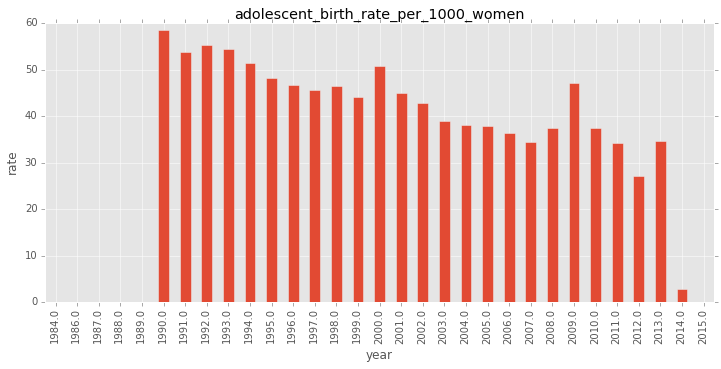

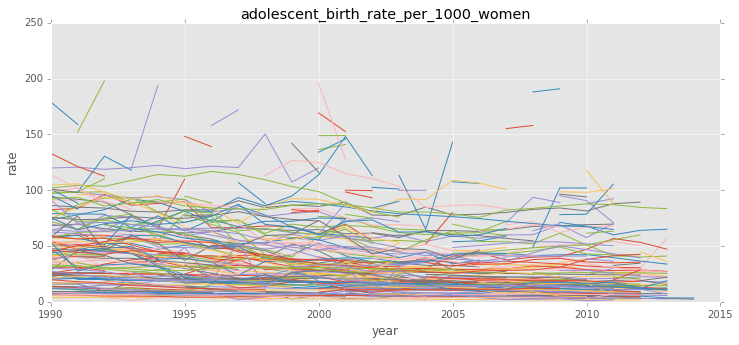

In [22]:
abr = 'adolescent_birth_rate_per_1000_women'
plot_me_data(abr, 'rate')
plot_by_country(abr, 'rate')

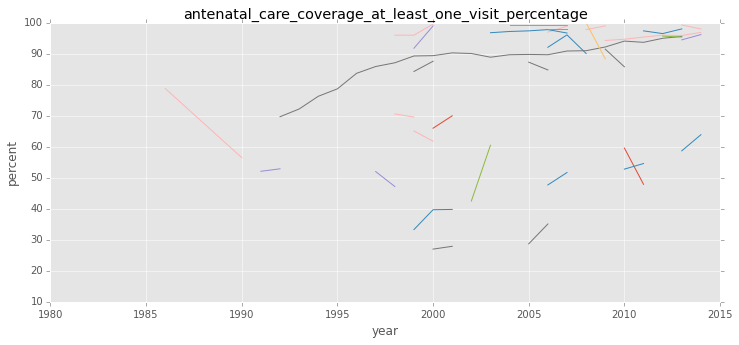

In [23]:
plot_by_country('antenatal_care_coverage_at_least_one_visit_percentage')

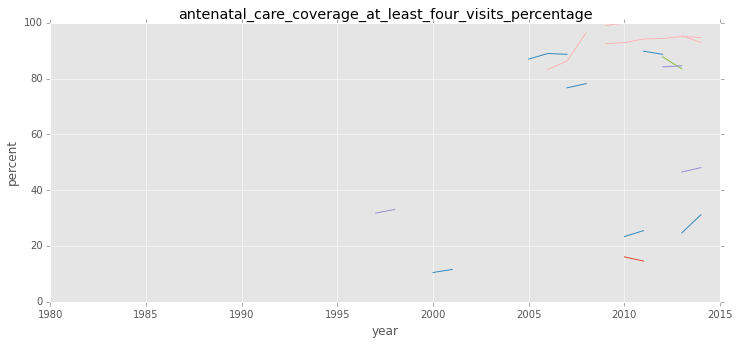

In [24]:
plot_by_country('antenatal_care_coverage_at_least_four_visits_percentage')

###Investigate poverty & international aid variables

In [25]:
pv_tot = 'population_below_national_poverty_line_total_percentage'
undata.ix[undata[pv_tot].idxmax()][['countryname', 'year', pv_tot]]

countryname                                                Tajikistan
year                                                             1999
population_below_national_poverty_line_total_percentage            96
Name: 2409, dtype: object

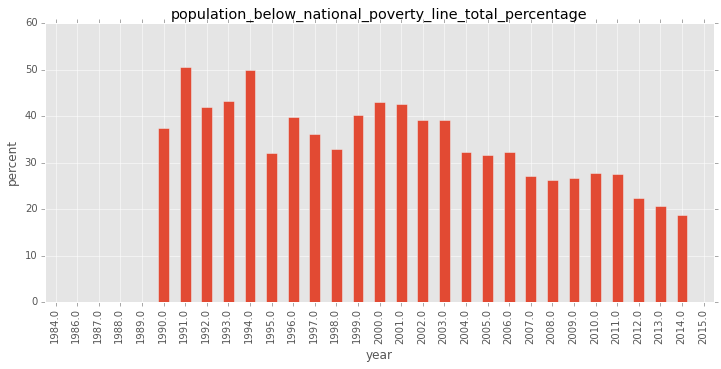

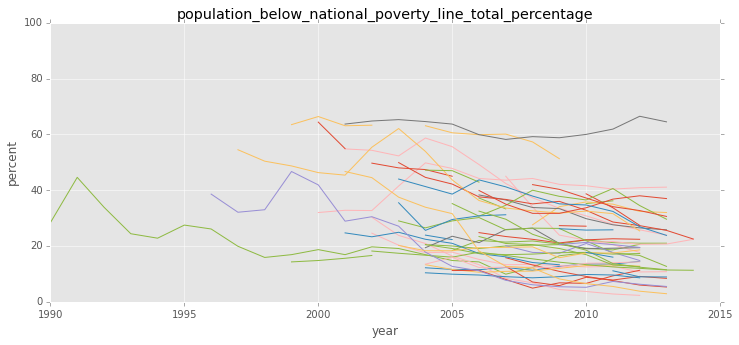

In [26]:
plot_me_data(pv_tot)
plot_by_country(pv_tot)

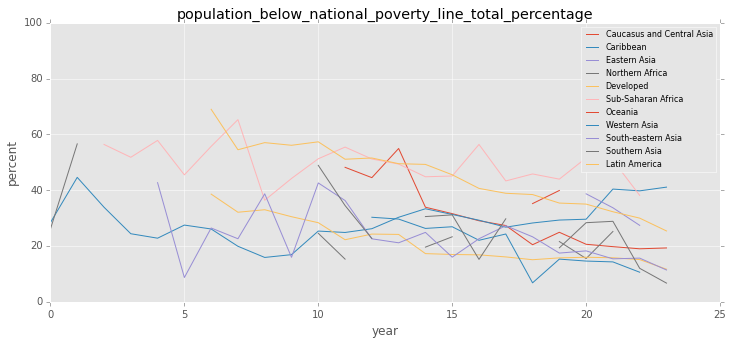

In [27]:
plot_by_region(pv_tot)

In [34]:
pd.DataFrame(undata.groupby(['mdgregions'])[pv_tot].mean()).sort(columns=pv_tot, ascending=False)

,population_below_national_poverty_line_total_percentage
mdgregions,
Sub-Saharan Africa,49.233684
Latin America,40.131457
Oceania,35.020000
Southern Asia,29.729583
Caribbean,29.464865
Caucasus and Central Asia,27.533333
South-eastern Asia,22.945763
Eastern Asia,22.080000
Western Asia,21.774074


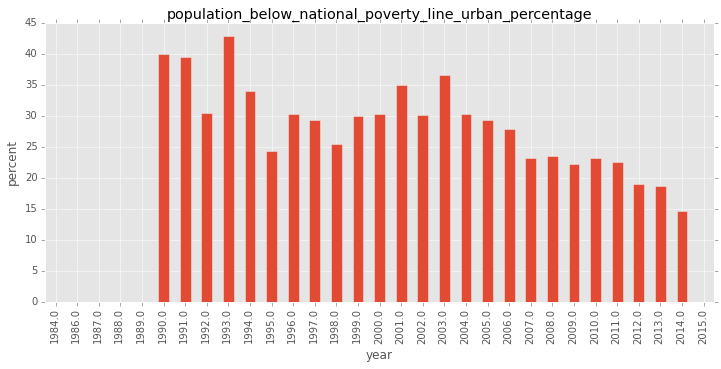

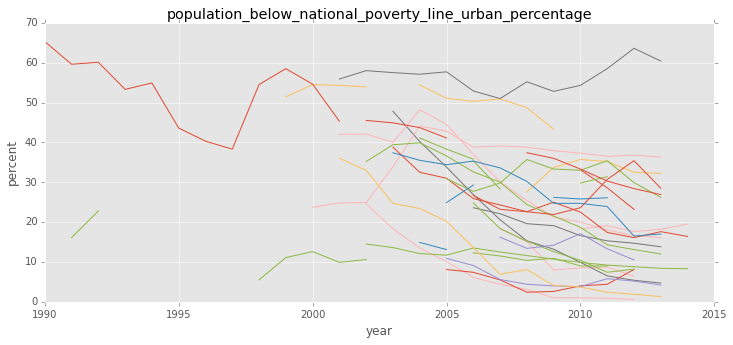

In [35]:
pv_urb = 'population_below_national_poverty_line_urban_percentage'
plot_me_data(pv_urb)
plot_by_country(pv_urb)

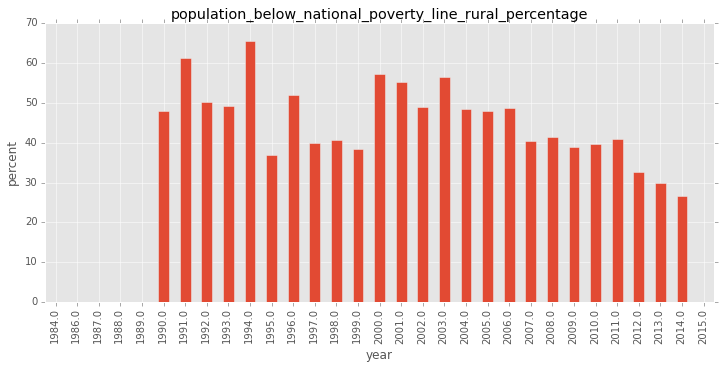

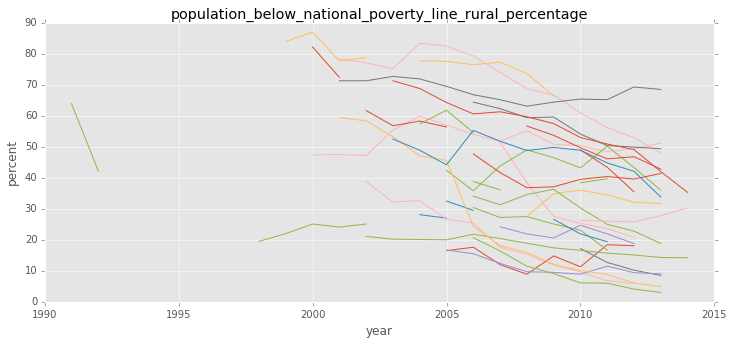

In [36]:
pv_rur = 'population_below_national_poverty_line_rural_percentage'
plot_me_data(pv_rur)
plot_by_country(pv_rur)

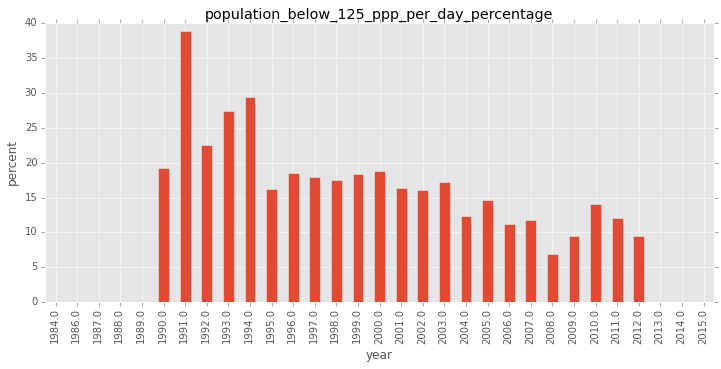

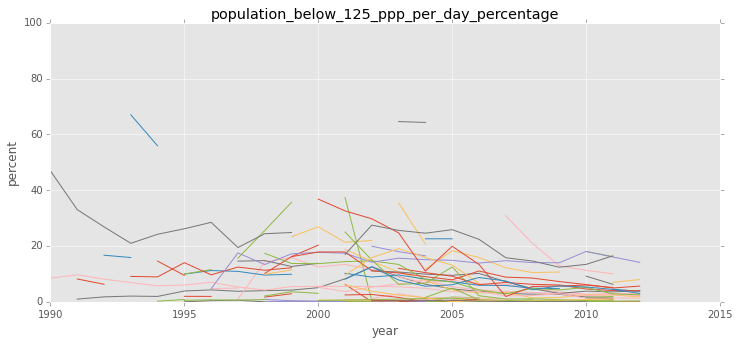

In [37]:
pv_125 = 'population_below_125_ppp_per_day_percentage'
plot_me_data(pv_125)
plot_by_country(pv_125)

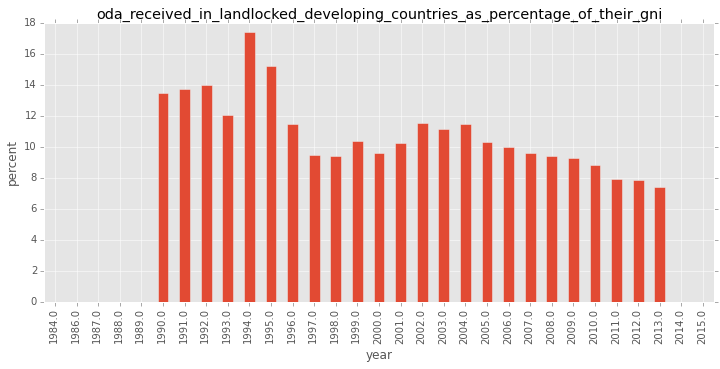

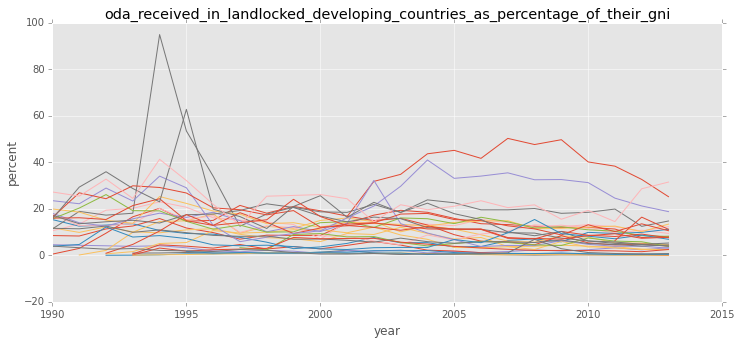

,oda_received_in_landlocked_developing_countries_as_percentage_of_their_gni
countryname,
Afghanistan,38.288462
Burundi,24.125833
Malawi,23.834583
Rwanda,23.573333
Zambia,18.920417
Bhutan,15.570000
Mali,15.010000
Niger,14.513333
Uganda,14.084167


In [38]:
oda_pct = 'oda_received_in_landlocked_developing_countries_as_percentage_of_their_gni'
plot_me_data(oda_pct)
plot_by_country(oda_pct)
oda1 = pd.DataFrame(undata.groupby(['countryname'])[oda_pct].mean())
oda1.sort(columns=oda_pct, ascending=False).head(10)

In [39]:
undata[['countryname', 'year', oda_pct]].sort(columns=oda_pct, ascending=False).head(15)

,countryname,year,oda_received_in_landlocked_developing_countries_as_percentage_of_their_gni
2044,Rwanda,1994,94.94
2789,Zambia,1995,62.76
2045,Rwanda,1995,53.48
75,Afghanistan,2007,50.28
77,Afghanistan,2009,49.72
76,Afghanistan,2008,47.64
73,Afghanistan,2005,45.14
72,Afghanistan,2004,43.66
74,Afghanistan,2006,41.70
1540,Malawi,1994,41.29


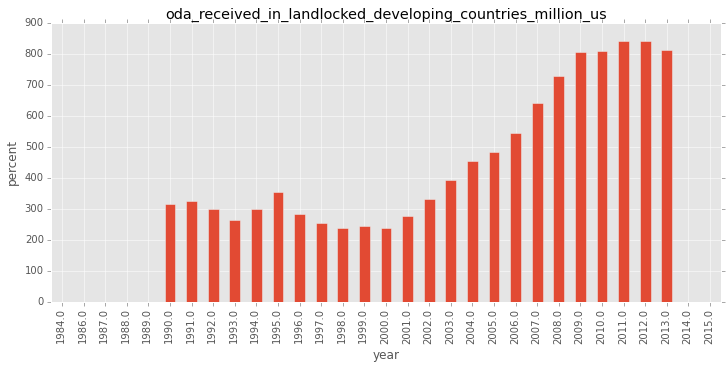

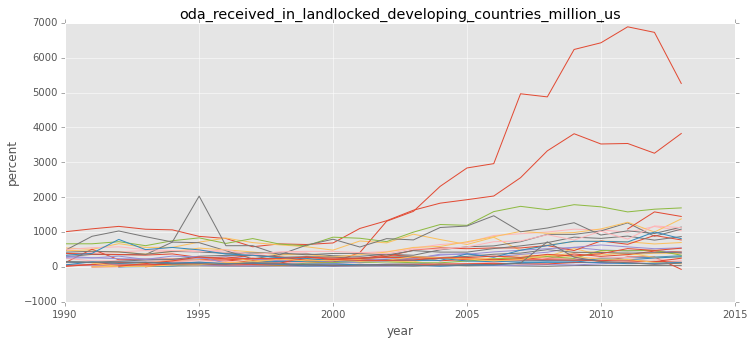

,oda_received_in_landlocked_developing_countries_million_us
countryname,
Afghanistan,55139.49
Ethiopia,43367.99
Uganda,26196.15
Zambia,22346.97
Bolivia,16065.58
Mali,15841.31
Burkina Faso,15249.36
Malawi,14859.71
Rwanda,14017.55


In [40]:
oda_dol = 'oda_received_in_landlocked_developing_countries_million_us'
plot_me_data(oda_dol)
plot_by_country(oda_dol)
oda2 = pd.DataFrame(undata.groupby(['countryname'])[oda_dol].sum())
oda2.sort(columns=oda_dol, ascending=False).head(10)

In [41]:
undata[['countryname', 'year', oda_dol]].sort(columns=oda_dol, ascending=False).head(15)

,countryname,year,oda_received_in_landlocked_developing_countries_million_us
2,Afghanistan,2011,6884.84
3,Afghanistan,2012,6725.93
1,Afghanistan,2010,6426.49
77,Afghanistan,2009,6235.40
6,Afghanistan,2013,5261.51
75,Afghanistan,2007,4964.72
76,Afghanistan,2008,4875.67
913,Ethiopia,2013,3825.11
909,Ethiopia,2009,3818.83
911,Ethiopia,2011,3539.39


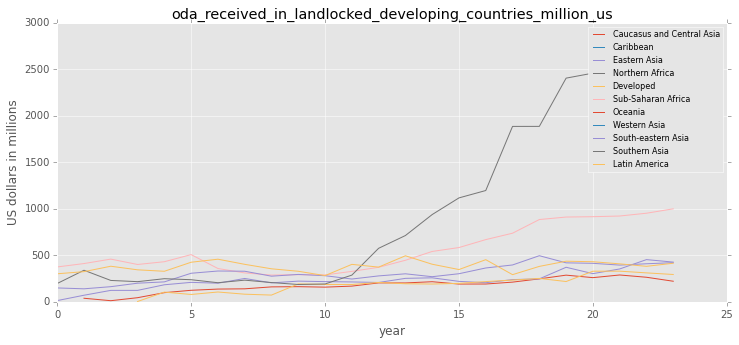

In [42]:
plot_by_region(oda_dol, 'US dollars in millions')